<a href="https://colab.research.google.com/github/xavbeta/LettersAndDigitKeras/blob/master/Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(28, 28)
5


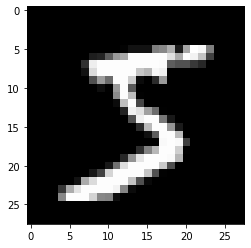

In [0]:
import tensorflow as tf
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normalize the training values
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train[0].shape)


print(y_train[0])

from matplotlib import pyplot as plt
plt.imshow(x_train[0],cmap='gray')
plt.show()



In [0]:


# A callback to stop our tranning
# when reaching enough accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # If you are using Tensorflow 1.x, replace 'accuracy' for 'acc' in the next line
    if(logs.get('acc')>0.99):
      print("\nReached 99.0% accuracy so cancelling training!")
      self.model.stop_training = True

# Create a basic model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, 
          y_train, 
          epochs=25,
          callbacks=[myCallback()])

# Evaluate the model
model.evaluate(x_test, y_test)




Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3004 - acc: 0.9124
Epoch 2/25
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1434 - acc: 0.9576
Epoch 3/25
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1063 - acc: 0.9672
Epoch 4/25
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0889 - acc: 0.9729
Epoch 5/25
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0749 - acc: 0.9761
Epoch 6/25
60000/60000 [==============================] - 7s 108us/sample - loss: 0.0657 - acc: 0.9793
Epoch 7/25
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0575 - acc: 0.9805
Epoch 8/25
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0531 - acc: 0.9828
Epoch 9/25
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0479 - acc: 0.9842
Epoch 10/25
60000/60000 [===========================

[0.08057804638598028, 0.9792]

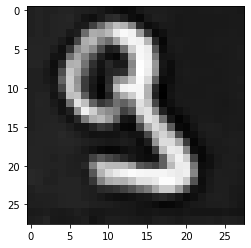

[[3.2302266e-14 3.1164128e-14 3.7086867e-08 9.9246162e-01 4.6458600e-33
  7.5382525e-03 7.1056282e-12 2.1613375e-14 7.0445118e-08 6.7718479e-16]]
3


In [0]:
FILE = 'nove.png'

from PIL import Image
import numpy as np
import cv2

img_path = FILE
img = cv2.imread(img_path) # read image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img= cv2.bitwise_not(img)
plt.imshow(img,cmap='gray')
plt.show()

new_img = img / 255.0  # now all values are ranging from 0 to 1, where white equlas 0.0 and black equals 1.0 
new_img = np.expand_dims(new_img, axis=0)

new_img.shape


predictions = model.predict(new_img)
print(predictions)
print(np.argmax(predictions[0]))